
# Implement the brute force algorithm for the Vertex Cover problem for n = 10, m = 10, 20, 30, 40. Record the size of the computed vertex cover and the running time for each (n, m) pair.



Step-1 : Here we are generating the input for the no. of vertices=10 and no. of edges=[10,20,30,40] and putting them in a dictionary

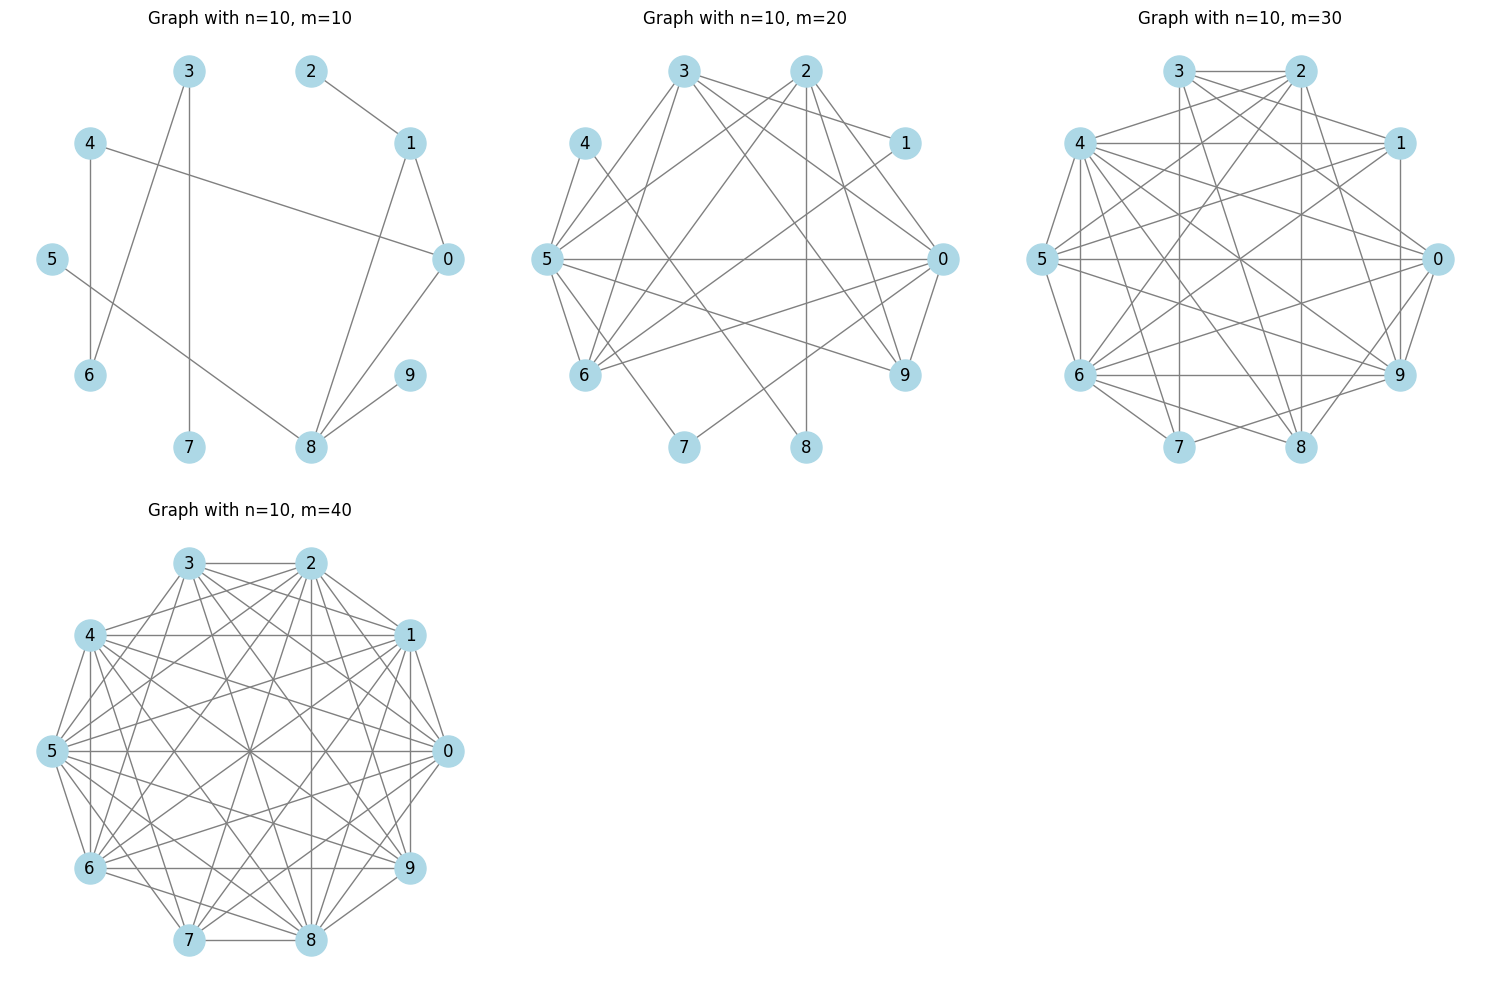

In [10]:
import random
import networkx as nx
import matplotlib.pyplot as plt

def generate_random_graph(n, m): # Took help from gpt here to make this function
    max_edges = n * (n - 1) // 2
    if m > max_edges:
        raise ValueError(f"Too many edges {m} for {n} nodes, max is {max_edges}")

    edges = set()
    while len(edges) < m:
        u = random.randint(0, n - 1)
        v = random.randint(0, n - 1)
        if u != v:
            edge = (min(u, v), max(u, v))
            edges.add(edge)
    return list(edges)

n = 10
m_values = [10, 20, 30, 40]
graphs = {}

for m in m_values:
    graphs[m] = generate_random_graph(n, m)

# Plotting
plt.figure(figsize=(15, 10))
pos = nx.circular_layout(range(n))  # fixed positions for all graphs

for i, m in enumerate(m_values, 1):
    G = nx.Graph()
    G.add_nodes_from(range(n))
    G.add_edges_from(graphs[m])

    plt.subplot(2, 3, i)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
    plt.title(f"Graph with n={n}, m={m}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Step-2 : Here are are storing the the input for every pair of vertices and columns into a csv file.

i.e. ***(n,m)--->(10,10),(10,20),(10,30) and (10,40).***

In [11]:
import csv

# After generating each graph in your loop:
for m in m_values:
    edges = graphs[m]
    filename = f"graph_n{n}_m{m}_input.csv"
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['node1', 'node2'])  # header
        for u, v in edges:  # Took help from gpt here to write the edges in the csv
            writer.writerow([u, v])
    print(f"Graph with n={n}, m={m} saved to {filename}")

Graph with n=10, m=10 saved to graph_n10_m10_input.csv
Graph with n=10, m=20 saved to graph_n10_m20_input.csv
Graph with n=10, m=30 saved to graph_n10_m30_input.csv
Graph with n=10, m=40 saved to graph_n10_m40_input.csv


Step-3 : Here we are implemeting vertex cover on all the pair of vertices and edges and calculating the cover size as well as running time.
One png image will be created for each graph highlighting the minimum vertex cover. Also one csv will be created for summary.

In [13]:
import itertools
import time
import networkx as nx # gpt helped in this cell to use networkx correctly
import matplotlib.pyplot as plt
import pandas as pd
import csv
import os

def is_vertex_cover(subset, edges): # took help from gpt to make this function
    subset_set = set(subset)
    for (u, v) in edges:
        if u not in subset_set and v not in subset_set:
            return False
    return True

def brute_force_vertex_cover(n, edges): # took help from gpt to make this function
    vertices = list(range(n))
    for r in range(1, n + 1):
        for subset in itertools.combinations(vertices, r):
            if is_vertex_cover(subset, edges):
                return subset
    return None

# Set parameters
n = 10  # number of nodes
# Corrected m_values to match the generated files
m_values = [10, 20, 30, 40]  # edges used to name files
results = []

# Define the layout to match the first plot
pos = nx.circular_layout(range(n))

plt.figure(figsize=(15, 10))

for i, m in enumerate(m_values, 1):
    filename = f"graph_n{n}_m{m}_input.csv"

    # Load edges from CSV
    edges = []
    with open(filename, mode='r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            u, v = int(row['node1']), int(row['node2'])
            edges.append((u, v))

    # Brute force minimum vertex cover
    start_time = time.time()
    cover = brute_force_vertex_cover(n, edges)
    end_time = time.time()

    cover_set = set(cover)
    cover_size = len(cover)
    running_time = end_time - start_time

    # Build and draw the graph
    G = nx.Graph()
    G.add_edges_from(edges)

    node_colors = ['red' if node in cover_set else 'lightblue' for node in G.nodes()]

    plt.subplot(2, 3, i)
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_weight='bold', edge_color='gray')
    plt.title(f"Graph n={n}, m={m} - Cover Size: {cover_size}")
    plt.axis('off')

    # Save the graph as a PNG file
    plt.savefig(f"graph_n{n}_m{m}_vertex_cover_output.png")
    plt.close()

    # Store results
    results.append({
        'Graph_n': n,
        'Graph_m': m,
        'Vertex_Cover_Size': cover_size,
        'Vertex_Cover': list(cover),
        'Time_Seconds': running_time
    })

plt.tight_layout()
plt.show()

# Save summary CSV
df = pd.DataFrame(results)
df.to_csv(f"vertex_cover_summary_n{n}.csv", index=False)

display(df[['Graph_m', 'Vertex_Cover_Size', 'Time_Seconds']])

<Figure size 640x480 with 0 Axes>

,Graph_m,Vertex_Cover_Size,Time_Seconds
0,10,4,0.000140
1,20,6,0.000352
2,30,6,0.000465
3,40,8,0.000595
